# Search Project
***

## 1. Import Libraries:

In [1]:
from zipfile import ZipFile
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import numpy as np
from io import BytesIO

## 2. Read data from Zip File and create my database:

In [2]:
pytesseract.pytesseract.tesseract_cmd = (
# here you must enter the location of  pytesseract in your system. for example in mine is bellow:
#     r"E:\Tesseract-ocr\tesseract.exe"
)

zipdir =r"small_img.zip" # you should enter small_img Zip file path.  
database = list()
with ZipFile(zipdir,"r") as zip:
    for name in zip.namelist():
        data = zip.read(name)
        img = Image.open(BytesIO(data))
        database.append({"image":img,"text":"","gray":None,"name":name,"cropped":list()})

## 3. Modify my Database:
With this function image is converted from *RGB* color space to *Gray Scale* color space and text and faces are determined in that image.
Finally it returns modified database and cropped images.

In [3]:
def Modify_Database(Database,scale_factor = 1.3,height = 256,width = 256):
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

    cropped=list()
    for data in Database:
        data["gray"] = cv.cvtColor(np.array(data["image"]),cv.COLOR_BGR2GRAY)
        data["text"]= pytesseract.image_to_string(data["gray"])
       
        boxes = face_cascade.detectMultiScale(data["gray"],scaleFactor=scale_factor)

        for box in boxes:
            img = data["image"].crop((box[0],box[1],box[0]+box[2],box[1]+box[3]))
            img.thumbnail((width,height))
            data["cropped"].append(img)  
            
    return Database

## 4. Create contact sheet:
With this function we create our contact sheet.

In [11]:
def Create_contact_sheet(Data,height = 256,width = 256):
    Cropped = Data["cropped"]
    if len(Cropped) == 0 :
        print(f"\t\tthere were no faces in {data['name']}!")
    else:
        contact_sheet = Image.new("RGB",size=((5*width,(len(Cropped)//5 +1)*height)))
            
        for index in range(len(Cropped)):
            contact_sheet.paste(Cropped[index], ((index%5)*width,(index//5)*height ))
            
    plt.imshow(contact_sheet)
    plt.show()

## 5. Search text in image:

In [9]:
def Search_text(Database,Desired_text):
    for data in Database:
        print(f"Searching in {data['name']}: ")
        if Desired_text in data["text"]:
            print(f"\t{Desired_text} is found in {data['name']}: ")
            Create_contact_sheet(data)
        else:
            print(f"\t{Desired_text} is NOT found in {data['name']} !!!!")

## 6. run Modify_Database function:
Here our db is created.

In [6]:
db = Modify_Database(database)

## 7. Show result

Searching in a-0.png: 
	Christopher is found in a-0.png: 


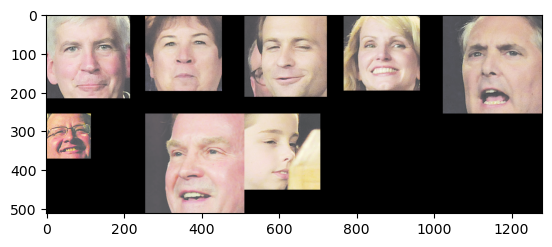

Searching in a-1.png: 
	Christopher is NOT found in a-1.png !!!!
Searching in a-2.png: 
	Christopher is NOT found in a-2.png !!!!
Searching in a-3.png: 
	Christopher is found in a-3.png: 


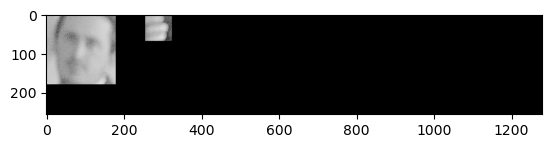

In [14]:
desired_text = "Christopher"

Search_text(database,desired_text)

***
**Author: Amir mohammad Ghiasi**

Gmail: a.ghiasi1377@gmail.com